# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics         import plot_confusion_matrix
from sklearn.metrics         import ConfusionMatrixDisplay

%matplotlib inline

In [23]:
X_train = pd.read_csv('https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/M%C3%B3dulo%2017%20%C3%81rvores%20II/arquivos%20csv/X_train.csv', index_col=[0])
y_train = pd.read_csv('https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/M%C3%B3dulo%2017%20%C3%81rvores%20II/arquivos%20csv/y_train.csv', index_col=[0])
X_test = pd.read_csv('https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/M%C3%B3dulo%2017%20%C3%81rvores%20II/arquivos%20csv/X_test.csv', index_col=[0])
y_test = pd.read_csv('https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/M%C3%B3dulo%2017%20%C3%81rvores%20II/arquivos%20csv/y_test.csv', index_col=[0])

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_valid:', X_valid.shape)
print('y_valid:', y_valid.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5514, 562)
y_train: (5514, 1)
X_valid: (1838, 562)
y_valid: (1838, 1)
X_test: (2947, 562)
y_test: (2947, 1)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [25]:
clf = DecisionTreeClassifier(max_depth=4, 
                             random_state=42).fit(X=X_train, 
                                                  y=y_train)

three_best_vars = (pd.DataFrame(data={'var': X_train.columns, 
                                      'feature_importances_': clf.feature_importances_})
                     .sort_values(by='feature_importances_', 
                                  ascending=False))
print(three_best_vars)

cols = three_best_vars['var'].values[:3]
print('3 melhores variáveis:', cols)

                                var  feature_importances_
52         ('tGravityAcc-min()-X',)              0.285303
271           ('fBodyAcc-mad()-X',)              0.254091
559       ('angle(Y,gravityMean)',)              0.164608
214       ('tGravityAccMag-std()',)              0.140142
69   ('tGravityAcc-arCoeff()-Y,1',)              0.122278
..                              ...                   ...
183  ('tBodyGyroJerk-entropy()-Y',)              0.000000
182  ('tBodyGyroJerk-entropy()-X',)              0.000000
181      ('tBodyGyroJerk-iqr()-Z',)              0.000000
180      ('tBodyGyroJerk-iqr()-Y',)              0.000000
561                         subject              0.000000

[562 rows x 2 columns]
3 melhores variáveis: ["('tGravityAcc-min()-X',)" "('fBodyAcc-mad()-X',)"
 "('angle(Y,gravityMean)',)"]


In [26]:
X_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5514 entries, 6593 to 7270
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ('tGravityAcc-min()-X',)   5514 non-null   float64
 1   ('fBodyAcc-mad()-X',)      5514 non-null   float64
 2   ('angle(Y,gravityMean)',)  5514 non-null   float64
dtypes: float64(3)
memory usage: 172.3 KB


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [27]:
%%time

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X=X_train[cols], 
                                                                            y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, 
                                 ccp_alpha=ccp_alpha).fit(X=X_train[cols], 
                                                          y=y_train)
    clfs.append(clf)

CPU times: total: 3.45 s
Wall time: 8.47 s


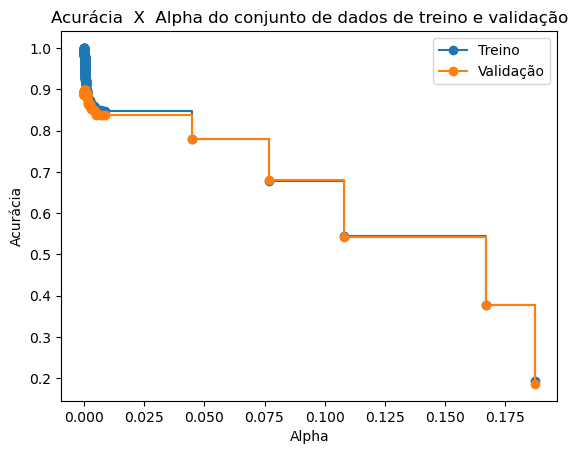

CPU times: total: 1.09 s
Wall time: 2.13 s


In [28]:
%%time
train_scores = [clf.score(X=X_train[cols], y=y_train) for clf in clfs]
valid_scores = [clf.score(X=X_valid[cols], y=y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  X  Alpha do conjunto de dados de treino e validação')
ax.plot(ccp_alphas, 
        train_scores, 
        marker='o', 
        label='Treino', 
        drawstyle='steps-post')
ax.plot(ccp_alphas, 
        valid_scores, 
        marker='o', 
        label='Validação', 
        drawstyle='steps-post')
ax.legend()
plt.show()

In [29]:
best_tree_index = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[best_tree_index]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[best_tree_index] * 100:.2f}')

best_tree

Acurácia da melhor árvore na base de validação: 89.83


DecisionTreeClassifier(ccp_alpha=0.000346942959423444, random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 71.56


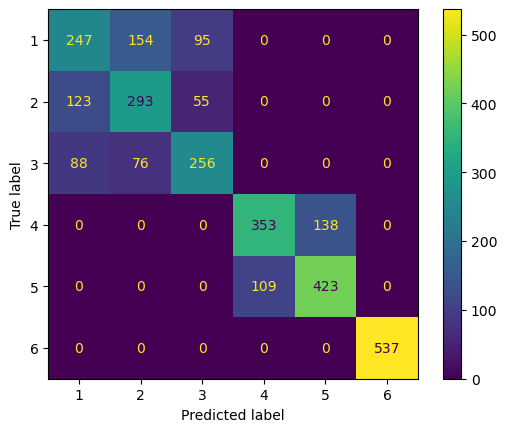

In [30]:
accuracy_test = best_tree.score(X=X_test[cols], 
                                y=y_test)

print(f'Acurácia da melhor árvore na base de testes: {accuracy_test * 100:.2f}')

ConfusionMatrixDisplay.from_estimator(estimator=best_tree, 
                                      X=X_test[cols], 
                                      y=y_test);